In [0]:
# Pasos previos: obtener credenciales en https://www.buenosaires.gob.ar/desarrollourbano/transporte/apitransporte
# Toda la documentacion esta disponible en: https://www.buenosaires.gob.ar/desarrollourbano/transporte/apitransporte/api-doc

In [0]:
# Para descargar en Jupyter Notebook
#! pip install datetime
#! pip install seaborn
#! pip install matplotlib

In [0]:
import pandas as pd
import numpy as np
import urllib.request
import re
import requests
import json
from pandas.io.json import json_normalize
from datetime import date
from datetime import datetime
from pandas import Timestamp
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
from matplotlib.pyplot import suptitle

In [0]:
#configuracion para poder ver todas las columnas del dataset
pd.set_option('display.max_columns', 500)

In [0]:
# Vamos a usar el csv de paradas de colectivos que está en BA Data (https://data.buenosaires.gob.ar/)
data=pd.read_csv('http://cdn.buenosaires.gob.ar/datosabiertos/datasets/colectivos/paradas-de-colectivo.csv')

In [0]:
data

,stop_id,stop_code,stop_name,stop_lat,stop_lon,direction_id,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type
0,201,201,1520 DEFENSA,-34.625663,-58.371042,1,108,26,22A,JNAMBA022,Retiro - Cno. Centenario y Lavalleja,3
1,2072,2072,722 REGIMIENTO DE PATRICIOS AV.,-34.636743,-58.369765,1,108,26,22A,JNAMBA022,Retiro - Cno. Centenario y Lavalleja,3
2,2079,2079,324 REGIMIENTO DE PATRICIOS AV.,-34.632942,-58.370332,1,108,26,22A,JNAMBA022,Retiro - Cno. Centenario y Lavalleja,3
3,2084,2084,16 REGIMIENTO DE PATRICIOS AV.,-34.629952,-58.370600,1,108,26,22A,JNAMBA022,Retiro - Cno. Centenario y Lavalleja,3
4,20350,20350,1776 MONTES DE OCA MANUEL AV.,-34.647807,-58.372853,1,108,26,22A,JNAMBA022,Retiro - Cno. Centenario y Lavalleja,3
5,20358,20358,1358 MONTES DE OCA MANUEL AV.,-34.643285,-58.373720,1,108,26,22A,JNAMBA022,Retiro - Cno. Centenario y Lavalleja,3
6,20590,20590,368 YRIGOYEN HIPOLITO AV.,-34.608873,-58.371667,1,108,26,22A,JNAMBA022,Retiro - Cno. Centenario y Lavalleja,3
7,204216,204216,1291 GILARDI GILARDO,-34.591115,-58.373402,1,108,26,22A,JNAMBA022,Retiro - Cno. Centenario y Lavalleja,3
8,204249,204249,1557 RAMOS MEJIA JOSE MARIA DR. AV.,-34.589582,-58.372450,1,108,26,22A,JNAMBA022,Retiro - Cno. Centenario y Lavalleja,3
9,204264,204264,2033 PY COMODORO AV.,-34.588083,-58.368398,1,108,26,22A,JNAMBA022,Retiro - Cno. Centenario y Lavalleja,3


In [0]:
#Empezamos eligiendo una parada, por ejemplo, una que esté cerca del Konex. Filtramos primero las paradas que se encuentran 
#sobre calle corrientes
corrientes=data[data.stop_name.str.contains('corrientes', case=False)]

In [0]:
#Luego filtramos las que estén a la altura 3100, que es la misma que la del Konex
corrientes[corrientes.stop_name.str.contains('31', case=False)]

,stop_id,stop_code,stop_name,stop_lat,stop_lon,direction_id,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type
406,202380,202380,3146 CORRIENTES AV.,-34.604072,-58.409575,0,163,35,24A,JNAMBA024,Est. Villa del Pque. - Cement. Avellaneda x Ce...,3
1799,202381,202381,3132 CORRIENTES AV.,-34.604080,-58.409400,1,2472,6,124A,JNAMBA124,Fac. de Derecho - 9 de Julio y C. Pellegrini,3
4548,202379,202379,3162 CORRIENTES AV.,-34.604062,-58.409782,1,117,23,146A,JNAMBA146,Ciudadela - Correo Central,3
4551,202390,202390,2316 CORRIENTES AV.,-34.604603,-58.399757,1,117,23,146A,JNAMBA146,Ciudadela - Correo Central,3


In [0]:
#Encontramos una parada a dos cuadras:

![image.png](attachment:image.png)

## Vamos a la API de Transporte:

In [0]:
# obtenemos el endpoint
link_api= 'https://apitransporte.buenosaires.gob.ar/colectivos/oba/arrivals-and-departures-for-stop/82_202380?client_id=044e963f3ce54cdead018d5c260434f7&client_secret=a3644890b843469cb89170De8515Eb9d'

In [0]:
consulta_api=urllib.request.urlopen(link_api) # hacemos la consulta a la API y 
archivo_json=json.load(consulta_api) # guardamos la respuesta en formato json

In [0]:
# pasamos el json a formato dataframe y le asignamos el encoding utf-8:
df=pd.read_json(link_api, encoding='utf-8') 

In [0]:
#vemos lo que tiene el df..
df.head()

,code,currentTime,data,text,version
entry,200,1567089040828,{'arrivalsAndDepartures': [{'arrivalEnabled': ...,OK,2
references,200,1567089040828,"{'agencies': [{'disclaimer': '', 'email': '', ...",OK,2


In [0]:
# iteramos por cada columna y pasamos cada valor a una celda:
df1 = pd.concat([pd.DataFrame(json_normalize(x)) for x in df['data']],ignore_index=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
# y vemos que contiene varios jsons adentro del dataframe
df1

,agencies,arrivalsAndDepartures,nearbyStopIds,routes,situationIds,situations,stopId,stops,trips
0,NaN,"[{'arrivalEnabled': True, 'blockTripSequence':...","[82_202381, 82_202379, 82_202378, 82_206282, 8...",NaN,[],NaN,82_202380,NaN,NaN
1,"[{'disclaimer': '', 'email': '', 'fareUrl': ''...",NaN,NaN,"[{'agencyId': '35', 'color': '', 'description'...",NaN,[],NaN,"[{'code': '202380', 'direction': 'E', 'id': '8...","[{'blockId': '13_94HI1106', 'directionId': '1'..."


In [0]:
# nos quedamos con el json que nos interesa, que es el de arrivalsAndDepartures. Lo pasamos a dataframe:
arr_and_dep= pd.concat([pd.DataFrame(json_normalize(x)) for x in df1.iloc[0,1]],ignore_index=True)
arr_and_dep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,arrivalEnabled,blockTripSequence,departureEnabled,distanceFromStop,frequency,lastUpdateTime,numberOfStopsAway,predicted,predictedArrivalInterval,predictedArrivalTime,predictedDepartureInterval,predictedDepartureTime,routeId,routeLongName,routeShortName,scheduledArrivalInterval,scheduledArrivalTime,scheduledDepartureInterval,scheduledDepartureTime,serviceDate,situationIds,status,stopId,stopSequence,tripHeadsign,tripId,tripStatus.activeTripId,tripStatus.blockTripSequence,tripStatus.closestStop,tripStatus.closestStopTimeOffset,tripStatus.distanceAlongTrip,tripStatus.frequency,tripStatus.lastKnownDistanceAlongTrip,tripStatus.lastKnownLocation,tripStatus.lastKnownLocation.lat,tripStatus.lastKnownLocation.lon,tripStatus.lastKnownOrientation,tripStatus.lastLocationUpdateTime,tripStatus.lastUpdateTime,tripStatus.nextStop,tripStatus.nextStopTimeOffset,tripStatus.orientation,tripStatus.phase,tripStatus.position.lat,tripStatus.position.lon,tripStatus.predicted,tripStatus.scheduleDeviation,tripStatus.scheduledDistanceAlongTrip,tripStatus.serviceDate,tripStatus.situationIds,tripStatus.status,tripStatus.totalDistanceAlongTrip,tripStatus.vehicleId,tripStatus.vehicleLabel,vehicleId,vehicleLabel
0,True,0,True,-921.188076,None,1567088996000,-4,True,None,1567088802000,None,1567088802000,13_94,JNAMBA026,26A,None,1567088084000,None,1567088084000,1567047600000,[],default,82_202380,27,a Retiro,13_144863-1,13_144863-1,0,82_202390,-4,9999.037264,None,0,NaN,-34.604660,-58.401932,0,0,1567088996000,82_202391,46,1.642440,,-34.604598,-58.399578,True,718,9999.037264,1567047600000,[],default,15000.941044,13_4188,209-54,13_4188,209-54
1,True,0,True,-913.068517,None,0,-4,False,None,0,None,0,13_94,JNAMBA026,26A,None,1567088804000,None,1567088804000,1567047600000,[],default,82_202380,27,a Retiro,13_144867-1,13_144867-1,0,82_202390,-2,0.000000,None,0,None,NaN,NaN,0,0,0,82_202391,48,1.642440,,-34.604600,-58.399666,False,0,9990.917705,1567047600000,[],default,15000.941044,,,,
2,True,0,True,-819.273191,None,1567088941000,-3,True,None,1567088830000,None,1567088830000,35_164,JNAMBA024,24B,None,1567088582000,None,1567088582000,1567047600000,[],default,82_202380,24,2 - Lynch - IDA,35_27575-1,35_27575-1,0,82_202390,22,9703.742380,None,0,NaN,-34.604599,-58.405655,0,0,1567088941000,82_202390,22,1.814916,,-34.604633,-58.400690,True,248,9703.742380,1567047600000,[],default,30791.736522,35_10359,4972-85,35_10359,4972-85
3,True,0,True,-560.653746,None,1567088996000,-2,True,None,1567088896000,None,1567088896000,13_94,JNAMBA026,26A,None,1567088084000,None,1567088084000,1567047600000,[],default,82_202380,27,a Retiro,13_144863-1,13_144863-1,0,82_202388,26,9638.502934,None,0,NaN,-34.604561,-58.405899,0,0,1567088996000,82_202388,26,2.427887,,-34.604759,-58.403512,True,812,9638.502934,1567047600000,[],default,15000.941044,13_3775,254-54,13_3775,254-54
4,True,0,True,-331.433002,None,1567088995000,-1,True,None,1567088954000,None,1567088954000,13_94,JNAMBA026,26A,None,1567088264000,None,1567088264000,1567047600000,[],default,82_202380,27,a Retiro,13_144864-1,13_144864-1,0,82_202384,2,9409.282190,None,0,NaN,-34.604271,-58.408375,0,0,1567088995000,82_202384,2,351.465412,,-34.604500,-58.405993,True,690,9409.282190,1567047600000,[],default,15000.941044,13_4397,247-54,13_4397,247-54
5,True,0,True,325.967015,None,1567088905000,0,True,None,1567089122000,None,1567089122000,35_164,JNAMBA024,24B,None,1567089002000,None,1567089002000,1567047600000,[],default,82_202380,24,2 - Lynch - IDA,35_27576-1,35_27576-1,0,82_202376,-14,8558.502174,None,0,NaN,-34.604118,-58.414280,0,0,1567088905000,82_202380,82,3.331952,,-34.604160,-58.413129,True,120,8558.502174,1567047600000,[],default,30791.736522,35_10514,4922-85,35_10514,4922-85
6,True,0,True,538.561972,None,1567088968000,1,True,None,1567089178000,None,1567089178000,35_163,JNAMBA024,24A,None,1567088888000,None,1567088888000,1567047600000,[],default,82_202380,24,a Barracas - IDA,35_27291-1,35_27291-1,0,82_201220,-16,8345.907217,None,0,NaN,-34.603271,-58.4

In [3]:
###En el caso de que no llegue a funcionar. El csv pueden obtenerlo en el github:
##arr_and_dep = pd.read_csv("https://github.com/datosgcba/taller-api-transporte/blob/master/oba.csv", error_bad_lines=False)

b'Skipping line 75: expected 1 fields, saw 7\nSkipping line 124: expected 1 fields, saw 3\nSkipping line 141: expected 1 fields, saw 9\nSkipping line 142: expected 1 fields, saw 3\nSkipping line 166: expected 1 fields, saw 4\nSkipping line 170: expected 1 fields, saw 2\nSkipping line 172: expected 1 fields, saw 2\nSkipping line 173: expected 1 fields, saw 2\nSkipping line 174: expected 1 fields, saw 2\nSkipping line 175: expected 1 fields, saw 2\nSkipping line 176: expected 1 fields, saw 2\nSkipping line 177: expected 1 fields, saw 2\nSkipping line 178: expected 1 fields, saw 2\nSkipping line 179: expected 1 fields, saw 2\nSkipping line 180: expected 1 fields, saw 2\nSkipping line 184: expected 1 fields, saw 2\nSkipping line 185: expected 1 fields, saw 2\nSkipping line 191: expected 1 fields, saw 2\nSkipping line 199: expected 1 fields, saw 4\nSkipping line 205: expected 1 fields, saw 2\nSkipping line 210: expected 1 fields, saw 2\nSkipping line 211: expected 1 fields, saw 2\nSkipping 

In [0]:
# vemos la cantidad de filas y columnas... estas ultimas son muchas, hay mucha informacion que no nos interesa
arr_and_dep.shape

(39, 56)

In [0]:
# asi que nos quedamos con las siguientes columnas:
arr_and_dep = arr_and_dep[['distanceFromStop',  'numberOfStopsAway',
       'predictedArrivalTime',
       'predictedDepartureTime', 
       'routeShortName', 
       'scheduledArrivalTime', 
       'scheduledDepartureTime',
       'stopId', 'stopSequence', 'tripHeadsign', 
       'tripStatus.closestStop',
       'tripStatus.lastKnownLocation.lat', 'tripStatus.lastKnownLocation.lon',      
       'tripStatus.nextStop',
       'tripStatus.position.lat',
       'tripStatus.position.lon', 'tripStatus.totalDistanceAlongTrip'
       ]]

In [0]:
# ahora tenemos 17 columnas
arr_and_dep.shape

(39, 17)

### Ahora vamos a cambiar el formato de las columnas que contienen fechas:

In [0]:
# primero vamos reemplazar con valores nulos las celdas que no tienen fecha..
arr_and_dep['predictedArrivalTime']=arr_and_dep['predictedArrivalTime'].replace(0, np.nan)
arr_and_dep['predictedDepartureTime']=arr_and_dep['predictedDepartureTime'].replace(0, np.nan)
arr_and_dep['scheduledArrivalTime']=arr_and_dep['scheduledArrivalTime'].replace(0, np.nan)
arr_and_dep['scheduledDepartureTime']=arr_and_dep['scheduledDepartureTime'].replace(0, np.nan)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [0]:
# luego cambiamos el formato, de timestamp a datetime
arr_and_dep['predictedArrivalTime']=arr_and_dep['predictedArrivalTime'].apply(lambda x: Timestamp(x, unit='ms'))
arr_and_dep['predictedDepartureTime']=arr_and_dep['predictedDepartureTime'].apply(lambda x: Timestamp(x, unit='ms')) 
arr_and_dep['scheduledArrivalTime']=arr_and_dep['scheduledArrivalTime'].apply(lambda x: Timestamp(x, unit='ms')) 
arr_and_dep['scheduledDepartureTime']=arr_and_dep['scheduledDepartureTime'].apply(lambda x: Timestamp(x, unit='ms')) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [0]:
# cambiamos el uso horario (la API nos trae GMT, pasamos al horario local)
arr_and_dep['predictedArrivalTime'] = arr_and_dep['predictedArrivalTime'].dt.tz_localize('utc').dt.tz_convert('America/Argentina/Buenos_Aires')
arr_and_dep['predictedDepartureTime']=arr_and_dep['predictedDepartureTime'].dt.tz_localize('utc').dt.tz_convert('America/Argentina/Buenos_Aires')
arr_and_dep['scheduledArrivalTime']=arr_and_dep['scheduledArrivalTime'].dt.tz_localize('utc').dt.tz_convert('America/Argentina/Buenos_Aires') 
arr_and_dep['scheduledDepartureTime']=arr_and_dep['scheduledDepartureTime'].dt.tz_localize('utc').dt.tz_convert('America/Argentina/Buenos_Aires') 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [0]:
arr_and_dep.head()

,distanceFromStop,numberOfStopsAway,predictedArrivalTime,predictedDepartureTime,routeShortName,scheduledArrivalTime,scheduledDepartureTime,stopId,stopSequence,tripHeadsign,tripStatus.closestStop,tripStatus.lastKnownLocation.lat,tripStatus.lastKnownLocation.lon,tripStatus.nextStop,tripStatus.position.lat,tripStatus.position.lon,tripStatus.totalDistanceAlongTrip
0,-921.188076,-4,2019-08-29 11:26:42-03:00,2019-08-29 11:26:42-03:00,26A,2019-08-29 11:14:44-03:00,2019-08-29 11:14:44-03:00,82_202380,27,a Retiro,82_202390,-34.604660,-58.401932,82_202391,-34.604598,-58.399578,15000.941044
1,-913.068517,-4,NaT,NaT,26A,2019-08-29 11:26:44-03:00,2019-08-29 11:26:44-03:00,82_202380,27,a Retiro,82_202390,NaN,NaN,82_202391,-34.604600,-58.399666,15000.941044
2,-819.273191,-3,2019-08-29 11:27:10-03:00,2019-08-29 11:27:10-03:00,24B,2019-08-29 11:23:02-03:00,2019-08-29 11:23:02-03:00,82_202380,24,2 - Lynch - IDA,82_202390,-34.604599,-58.405655,82_202390,-34.604633,-58.400690,30791.736522
3,-560.653746,-2,2019-08-29 11:28:16-03:00,2019-08-29 11:28:16-03:00,26A,2019-08-29 11:14:44-03:00,2019-08-29 11:14:44-03:00,82_202380,27,a Retiro,82_202388,-34.604561,-58.405899,82_202388,-34.604759,-58.403512,15000.941044
4,-331.433002,-1,2019-08-29 11:29:14-03:00,2019-08-29 11:29:14-03:00,26A,2019-08-29 11:17:44-03:00,2019-08-29 11:17:44-03:00,82_202380,27,a Retiro,82_202384,-34.604271,-58.408375,82_202384,-34.604500,-58.405993,15000.941044


In [0]:
# y finalmente le quitamos el uso horario 
arr_and_dep['predictedArrivalTime'] = arr_and_dep['predictedArrivalTime'].dt.tz_localize(None)
arr_and_dep['predictedDepartureTime']=arr_and_dep['predictedDepartureTime'].dt.tz_localize(None)
arr_and_dep['scheduledArrivalTime']=arr_and_dep['scheduledArrivalTime'].dt.tz_localize(None)
arr_and_dep['scheduledDepartureTime']=arr_and_dep['scheduledDepartureTime'].dt.tz_localize(None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [0]:
# nos queda asi:
arr_and_dep

,distanceFromStop,numberOfStopsAway,predictedArrivalTime,predictedDepartureTime,routeShortName,scheduledArrivalTime,scheduledDepartureTime,stopId,stopSequence,tripHeadsign,tripStatus.closestStop,tripStatus.lastKnownLocation.lat,tripStatus.lastKnownLocation.lon,tripStatus.nextStop,tripStatus.position.lat,tripStatus.position.lon,tripStatus.totalDistanceAlongTrip
0,-691.668222,-3,2019-08-28 16:43:36,2019-08-28 16:43:36,24A,2019-08-28 16:41:08,2019-08-28 16:41:08,82_202380,24,a Barracas - IDA,82_202388,-34.604321,-58.406078,82_202390,-34.604699,-58.402082,29943.287042
1,-651.632300,-2,2019-08-28 16:43:46,2019-08-28 16:43:46,26A,2019-08-28 16:26:44,2019-08-28 16:26:44,82_202380,27,a Retiro,82_202388,-34.604431,-58.406414,82_202388,-34.604717,-58.402519,15000.941044
2,-635.809943,-2,2019-08-28 16:43:50,2019-08-28 16:43:50,26A,2019-08-28 16:29:44,2019-08-28 16:29:44,82_202380,27,a Retiro,82_202388,-34.604351,-58.406815,82_202388,-34.604725,-58.402692,15000.941044
3,-588.342871,-2,2019-08-28 16:44:02,2019-08-28 16:44:02,24B,2019-08-28 16:43:02,2019-08-28 16:43:02,82_202380,24,2 - Lynch - IDA,82_202388,-34.604511,-58.405739,82_202388,-34.604747,-58.403210,30791.736522
4,-422.208121,-2,NaT,NaT,26A,2019-08-28 16:44:44,2019-08-28 16:44:44,82_202380,27,a Retiro,82_202384,NaN,NaN,82_202388,-34.604625,-58.405014,15000.941044
5,253.115253,0,2019-08-28 16:47:38,2019-08-28 16:47:38,24A,2019-08-28 16:50:08,2019-08-28 16:50:08,82_202380,24,a Barracas - IDA,82_202376,-34.602970,-58.422779,82_202380,-34.604114,-58.412335,29943.287042
6,707.374981,2,NaT,NaT,24C,2019-08-28 16:49:48,2019-08-28 16:49:48,82_202380,24,a Ruta 197 y Ruta 8,82_201220,NaN,NaN,82_201220,-34.603554,-58.417222,16091.051866
7,843.775356,2,NaT,NaT,24A,2019-08-28 16:50:08,2019-08-28 16:50:08,82_202380,24,a Barracas - IDA,82_201212,NaN,NaN,82_201220,-34.603399,-58.418701,29943.287042
8,908.633690,2,2019-08-28 16:50:24,2019-08-28 16:50:24,24B,2019-08-28 16:51:32,2019-08-28 16:51:32,82_202380,24,2 - Lynch - IDA,82_201212,-34.602619,-58.425999,82_201220,-34.603338,-58.419405,30791.736522
9,970.917502,3,NaT,NaT,26A,2019-08-28 16:50:44,2019-08-28 16:50:44,82_202380,27,a Retiro,82_201212,NaN,NaN,82_201212,-34.603271,-58.420081,15000.941044


### Cambiemos de metros a cuadras las columnas que contienen distancias

In [0]:
arr_and_dep['distanceFromStop'] = arr_and_dep['distanceFromStop']/100
arr_and_dep['tripStatus.totalDistanceAlongTrip'] = arr_and_dep['tripStatus.totalDistanceAlongTrip']/100

In [0]:
arr_and_dep

,distanceFromStop,numberOfStopsAway,predictedArrivalTime,predictedDepartureTime,routeShortName,scheduledArrivalTime,scheduledDepartureTime,stopId,stopSequence,tripHeadsign,tripStatus.closestStop,tripStatus.lastKnownLocation.lat,tripStatus.lastKnownLocation.lon,tripStatus.nextStop,tripStatus.position.lat,tripStatus.position.lon,tripStatus.totalDistanceAlongTrip
0,-6.916682,-3,2019-08-28 16:43:36,2019-08-28 16:43:36,24A,2019-08-28 16:41:08,2019-08-28 16:41:08,82_202380,24,a Barracas - IDA,82_202388,-34.604321,-58.406078,82_202390,-34.604699,-58.402082,299.432870
1,-6.516323,-2,2019-08-28 16:43:46,2019-08-28 16:43:46,26A,2019-08-28 16:26:44,2019-08-28 16:26:44,82_202380,27,a Retiro,82_202388,-34.604431,-58.406414,82_202388,-34.604717,-58.402519,150.009410
2,-6.358099,-2,2019-08-28 16:43:50,2019-08-28 16:43:50,26A,2019-08-28 16:29:44,2019-08-28 16:29:44,82_202380,27,a Retiro,82_202388,-34.604351,-58.406815,82_202388,-34.604725,-58.402692,150.009410
3,-5.883429,-2,2019-08-28 16:44:02,2019-08-28 16:44:02,24B,2019-08-28 16:43:02,2019-08-28 16:43:02,82_202380,24,2 - Lynch - IDA,82_202388,-34.604511,-58.405739,82_202388,-34.604747,-58.403210,307.917365
4,-4.222081,-2,NaT,NaT,26A,2019-08-28 16:44:44,2019-08-28 16:44:44,82_202380,27,a Retiro,82_202384,NaN,NaN,82_202388,-34.604625,-58.405014,150.009410
5,2.531153,0,2019-08-28 16:47:38,2019-08-28 16:47:38,24A,2019-08-28 16:50:08,2019-08-28 16:50:08,82_202380,24,a Barracas - IDA,82_202376,-34.602970,-58.422779,82_202380,-34.604114,-58.412335,299.432870
6,7.073750,2,NaT,NaT,24C,2019-08-28 16:49:48,2019-08-28 16:49:48,82_202380,24,a Ruta 197 y Ruta 8,82_201220,NaN,NaN,82_201220,-34.603554,-58.417222,160.910519
7,8.437754,2,NaT,NaT,24A,2019-08-28 16:50:08,2019-08-28 16:50:08,82_202380,24,a Barracas - IDA,82_201212,NaN,NaN,82_201220,-34.603399,-58.418701,299.432870
8,9.086337,2,2019-08-28 16:50:24,2019-08-28 16:50:24,24B,2019-08-28 16:51:32,2019-08-28 16:51:32,82_202380,24,2 - Lynch - IDA,82_201212,-34.602619,-58.425999,82_201220,-34.603338,-58.419405,307.917365
9,9.709175,3,NaT,NaT,26A,2019-08-28 16:50:44,2019-08-28 16:50:44,82_202380,27,a Retiro,82_201212,NaN,NaN,82_201212,-34.603271,-58.420081,150.009410


### Tambien podemos calcular la diferencia entre el horario programado y el horario que predice la API  de llegada de los colectivos..

In [0]:
arr_and_dep['prediccion_vs_programado'] = arr_and_dep['predictedArrivalTime'] - arr_and_dep['scheduledArrivalTime']

In [0]:
arr_and_dep

,distanceFromStop,numberOfStopsAway,predictedArrivalTime,predictedDepartureTime,routeShortName,scheduledArrivalTime,scheduledDepartureTime,stopId,stopSequence,tripHeadsign,tripStatus.closestStop,tripStatus.lastKnownLocation.lat,tripStatus.lastKnownLocation.lon,tripStatus.nextStop,tripStatus.position.lat,tripStatus.position.lon,tripStatus.totalDistanceAlongTrip,programado_vs_predicted
0,-6.916682,-3,2019-08-28 16:43:36,2019-08-28 16:43:36,24A,2019-08-28 16:41:08,2019-08-28 16:41:08,82_202380,24,a Barracas - IDA,82_202388,-34.604321,-58.406078,82_202390,-34.604699,-58.402082,299.432870,00:02:28
1,-6.516323,-2,2019-08-28 16:43:46,2019-08-28 16:43:46,26A,2019-08-28 16:26:44,2019-08-28 16:26:44,82_202380,27,a Retiro,82_202388,-34.604431,-58.406414,82_202388,-34.604717,-58.402519,150.009410,00:17:02
2,-6.358099,-2,2019-08-28 16:43:50,2019-08-28 16:43:50,26A,2019-08-28 16:29:44,2019-08-28 16:29:44,82_202380,27,a Retiro,82_202388,-34.604351,-58.406815,82_202388,-34.604725,-58.402692,150.009410,00:14:06
3,-5.883429,-2,2019-08-28 16:44:02,2019-08-28 16:44:02,24B,2019-08-28 16:43:02,2019-08-28 16:43:02,82_202380,24,2 - Lynch - IDA,82_202388,-34.604511,-58.405739,82_202388,-34.604747,-58.403210,307.917365,00:01:00
4,-4.222081,-2,NaT,NaT,26A,2019-08-28 16:44:44,2019-08-28 16:44:44,82_202380,27,a Retiro,82_202384,NaN,NaN,82_202388,-34.604625,-58.405014,150.009410,NaT
5,2.531153,0,2019-08-28 16:47:38,2019-08-28 16:47:38,24A,2019-08-28 16:50:08,2019-08-28 16:50:08,82_202380,24,a Barracas - IDA,82_202376,-34.602970,-58.422779,82_202380,-34.604114,-58.412335,299.432870,-1 days +23:57:30
6,7.073750,2,NaT,NaT,24C,2019-08-28 16:49:48,2019-08-28 16:49:48,82_202380,24,a Ruta 197 y Ruta 8,82_201220,NaN,NaN,82_201220,-34.603554,-58.417222,160.910519,NaT
7,8.437754,2,NaT,NaT,24A,2019-08-28 16:50:08,2019-08-28 16:50:08,82_202380,24,a Barracas - IDA,82_201212,NaN,NaN,82_201220,-34.603399,-58.418701,299.432870,NaT
8,9.086337,2,2019-08-28 16:50:24,2019-08-28 16:50:24,24B,2019-08-28 16:51:32,2019-08-28 16:51:32,82_202380,24,2 - Lynch - IDA,82_201212,-34.602619,-58.425999,82_201220,-34.603338,-58.419405,307.917365,-1 days +23:58:52
9,9.709175,3,NaT,NaT,26A,2019-08-28 16:50:44,2019-08-28 16:50:44,82_202380,27,a Retiro,82_201212,NaN,NaN,82_201212,-34.603271,-58.420081,150.009410,NaT


## Probemos armar algunos graficos

<Figure size 432x288 with 0 Axes>

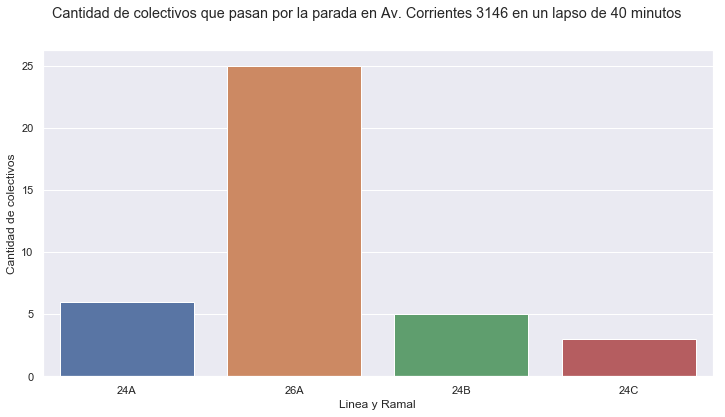

In [0]:
#Un grafico de barras, muy simple, que nos muestra la cantidad de colectivos segun linea y ramal que pasan por una determinada
# parada en un lapso de 40 minutos
figure()
sns.set(style="darkgrid")
figure(figsize=(12,6))
ax = sns.countplot(x="routeShortName", data=arr_and_dep)
ax.set_xlabel("Linea y Ramal")
ax.set_ylabel("Cantidad de colectivos")
suptitle("Cantidad de colectivos que pasan por la parada en Av. Corrientes 3146 en un lapso de 40 minutos")
show()

### Podemos probar otro tipo de grafico

In [0]:
# Primero tenemos que "acomodar" los datos 
pred = arr_and_dep.loc[:, ['predictedArrivalTime', 'routeShortName']] # nos quedamos con las dos columnas del df que queremos
pred['colectivo'] = '1' # agregamos una columna para poder contar cada una de las lineas de colectivos 
pred.columns = ['fecha', 'linea','colectivo'] #cambiamos el nombre de las columnas
pred = pd.DataFrame(pred) #le damos formato dataframe
pred.head()

,fecha,linea,colectivo
0,2019-08-28 16:43:36,24A,1
1,2019-08-28 16:43:46,26A,1
2,2019-08-28 16:43:50,26A,1
3,2019-08-28 16:44:02,24B,1
4,NaT,26A,1


In [0]:
pred=pred[pred['fecha'].notnull()] #eliminamos los casos que no tienen fecha
pred.colectivo = pred.colectivo.astype(int)  # le damos formato de numero a la columna colectivo

In [0]:
prueba = pred.pivot_table(values='colectivo', index= 'fecha', columns="linea") # modificamos la forma del df..

In [0]:
prueba

linea,24A,24B,24C,26A
fecha,,,,
2019-08-28 16:43:36,1.0,NaN,NaN,NaN
2019-08-28 16:43:46,NaN,NaN,NaN,1.0
2019-08-28 16:43:50,NaN,NaN,NaN,1.0
2019-08-28 16:44:02,NaN,1.0,NaN,NaN
2019-08-28 16:47:38,1.0,NaN,NaN,NaN
2019-08-28 16:50:24,NaN,1.0,NaN,NaN
2019-08-28 16:51:22,NaN,NaN,1.0,NaN
2019-08-28 16:52:02,NaN,NaN,NaN,1.0
2019-08-28 16:52:52,NaN,NaN,NaN,1.0


In [0]:
prueba['fecha'] = prueba.index # quitamos la fecha del indice y la asignamos a una columna

In [0]:
# completamos con ceros los valores nulos
prueba['24A'] = prueba['24A'].fillna(0).astype(int)
prueba['24B'] = prueba['24B'].fillna(0).astype(int)
prueba['26A'] = prueba['26A'].fillna(0).astype(int)

In [0]:
prueba2.head()

linea,24A,24B,26A,fecha
fecha,,,,
2019-08-28 12:28:34,0,0,1,2019-08-28 12:28:34
2019-08-28 12:29:26,0,0,1,2019-08-28 12:29:26
2019-08-28 12:29:40,0,0,1,2019-08-28 12:29:40
2019-08-28 12:31:44,0,1,0,2019-08-28 12:31:44
2019-08-28 12:33:28,0,0,1,2019-08-28 12:33:28


In [0]:
# definimos algunosp parametros para darle estilo a los graficos
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=10)

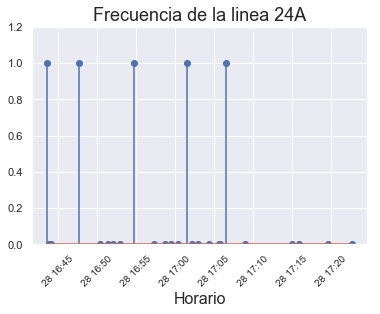

In [0]:
# armamos el grafico de la linea 24A
plt.stem(prueba['fecha'], prueba['24A'])
plt.ylim(0, 1.2)
plt.xlabel('Horario')
plt.title('Frecuencia de la linea 24A')
plt.xticks(rotation=45)
plt.show()


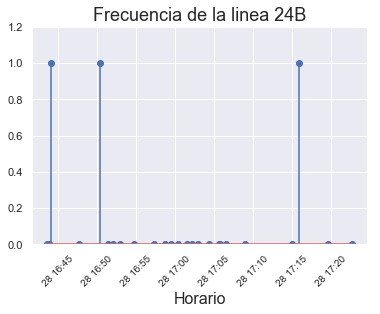

In [0]:
# armamos el grafico de la linea 24B
plt.stem(prueba['fecha'], prueba['24B'])
plt.ylim(0, 1.2)
plt.xlabel('Horario')
plt.title('Frecuencia de la linea 24B')
plt.xticks(rotation=45)
plt.show()

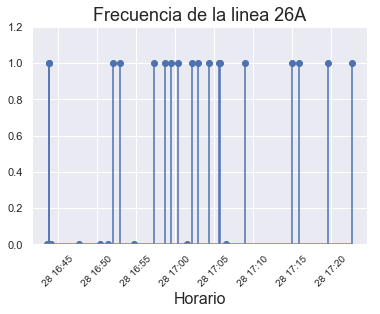

In [0]:
# y el de la 26A
plt.stem(prueba['fecha'], prueba['26A'])
plt.ylim(0, 1.2)
plt.xlabel('Horario')
plt.title('Frecuencia de la linea 26A')
plt.xticks(rotation=45)
plt.show()